Download monthly adjusted close price from Yahoo! for AAPL, BBRY, LULU and TLM and analyze correlations between them

In [1]:
import pandas.io.data as web
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
from numpy import corrcoef, arange
from pylab import pcolor, show, colorbar, xticks, yticks
%matplotlib inline

In [2]:
all_data = {} 
names = ['AAPL', 'BBRY', 'LULU', 'TLM']
for ticker in names:
    all_data[ticker] = web.get_data_yahoo(ticker, '2010-01-01', '2015-01-01')
price = pd.DataFrame({tic: data['Adj Close']
                      for tic, data in all_data.items()})

In [3]:
d2=price.asfreq('D')
d3=price.asfreq('BM') # daily prices have some missing values, therefore 'end of month' prices will also have nan values
mdata={} # we fix this by picking the last present price in a given month as an 'end of month' price.
for ticker in d3:
    d4=d3[ticker].tolist()
    mask=np.isnan(d4)    
    ind=np.where(mask)[0]    
    for i in ind:
        t=d3[ticker].index[i]
        while np.isnan(d2[ticker][t]):
              t=t-timedelta(days=1)
        d4[i]=d2[ticker][t]
    mdata[ticker]=d4
df = DataFrame(mdata, columns=names)

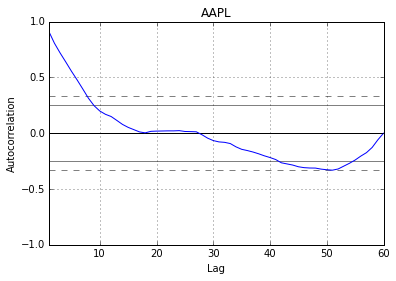

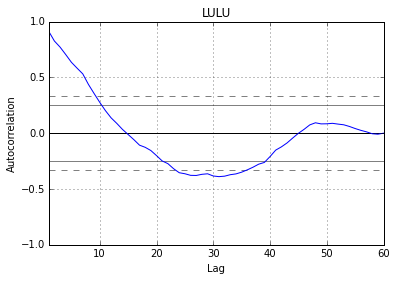

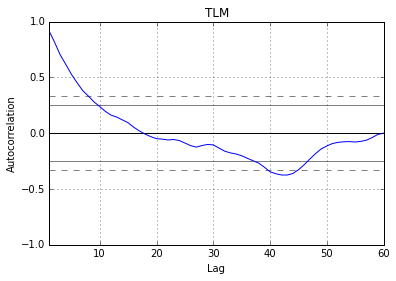

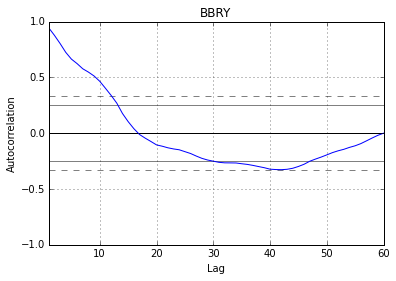

In [4]:
for x in mdata:
    plt.figure()
    autocorrelation_plot(mdata[x])
    plt.title(x)
    plt.figure()
plt.show() # The stocks are not really autocorrelated, except for small lags, which is always the case

In [5]:
df / df.shift(1) - 1

,AAPL,BBRY,LULU,TLM
0,NaN,NaN,NaN,NaN
1,0.065301,0.126689,0.014164,0.104549
2,0.148712,0.043595,0.448324,-0.067609
3,0.110830,-0.037583,-0.093057,-0.001318
4,-0.016202,-0.147493,0.086124,-0.002640
5,-0.020803,-0.188334,-0.089085,-0.099934
6,0.022721,0.167885,0.114455,0.129412
7,-0.054818,-0.255345,-0.207811,-0.085286
8,0.167277,0.136555,0.360925,0.115302
9,0.060669,0.169029,-0.008945,0.037013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09377E90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0AA5D630>]], dtype=object)

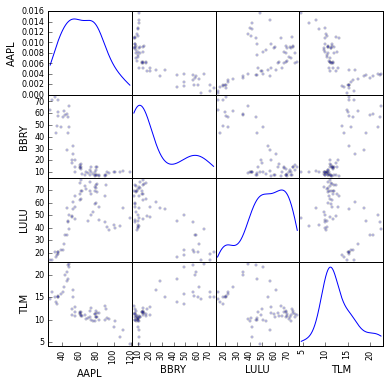

In [6]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

[[ 1.          0.50815029 -0.73177802 -0.79602954]
 [ 0.50815029  1.         -0.39696243 -0.76933412]
 [-0.73177802 -0.39696243  1.          0.78258453]
 [-0.79602954 -0.76933412  0.78258453  1.        ]]


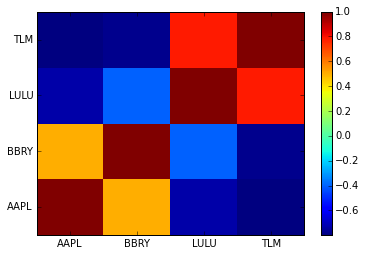

In [12]:
R = corrcoef(mdata.values())
pcolor(R)
print R
colorbar()
yticks(arange(0.5,4.0),names)
xticks(arange(0.5,4.0),names)
show() # I would choose TLM & AAPL as they are anticorrelated with the smallest number
# i.e., if one increases, the other one decreases, so that in a suitable proportion their total value was stable